In [280]:
import numpy as np
from astropy.io import ascii
import scipy.ndimage
import matplotlib.pyplot as plt
import os
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [281]:
TelAp_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/TelAp_quart_hex4X025sm1_N0300.dat"
FPM_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/FPM_quart_occspot_M050.dat"

#///////////////////////////////////////////////////////////////////////////
#                           Monochromatic tests
#///////////////////////////////////////////////////////////////////////////

# Working monochromatic solution produced by hex4_test_fullquad_mono.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann17D83_X025sm1Pad01_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_fullquad_mono.dat"

# Failed monochromatic solution produced by hex4_test_mono.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann28D83_X025sm1Pad004_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono.dat"

# Failed monochromatic solution produced by hex4_test_mono_v4.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann28D83_X025sm1Pad004_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono_v4.dat"

# Working monochromatic solution produced by hex4_test_fullquad_mono_v2.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann28D83_X025sm1Pad004_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_fullquad_mono_v2.dat"

# Working monochromatic solution produced by hex4_test_fullquad_mono_v3.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann28D83_X025sm1Pad004_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_fullquad_mono_v3.dat"

# Working monochromatic solution produced by hex4_test_fullquad_mono_v4.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_hex4Pad05X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_fullquad_mono_v4.dat"

# Working monochromatic solution produced by hex4_test_mono_v6.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_hex4Pad05X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono_v6.dat"

# Somewhat gray monochromatic solution produced by hex4_test_mono_v7.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_hex4Pad05X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono_v7.dat"
## slightly closer to binary with barhomogeneous switch:
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono_v7_barhom.dat"

# Somewhat gray monochromatic solution produced by hex4_test_mono_v8.mod, using spider Lyot stop
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono_v8.dat"

# Working monochromatic solution produced by hex4_test_mono_v9.mod
#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_test_mono_v9.dat"

#///////////////////////////////////////////////////////////////////////////
#                             Broadband tests
#///////////////////////////////////////////////////////////////////////////
LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_hex4Pad05X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case1_unitytrans_segLS.dat"
apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case1_unitytrans_segLS_barhom.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case2_nztrans_segLS.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case2_nztrans_segLS_barhom.dat"

#LS_fname = "/astro/opticslab1/SCDA/Apertures/STSCI/LS_quart_ann25D90_X025sm1Pad05_N0300.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case3_nztrans_XLS.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case3_nztrans_XLS_barhom.dat"
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test_ntz/hex4_bb_case4_unitytrans_XLS.dat"

# Broadband solution from March 15
#apod_sol_fname = "/astro/opticslab1/SCDA/Scripts/AMPL/hex4_design_test/ApodSol_APLC_quart_hex4X025sm1_N0300_FPM400M050_LSann17D83X025sm1Pad01_Img100C_35WA100CA100_BW10Nlam03fpres2_linbarhompre1.dat"

In [282]:
TelAp = np.loadtxt(TelAp_fname)
FPM = np.loadtxt(FPM_fname)
LS = np.loadtxt(LS_fname)
N = TelAp.shape[1]
A = np.zeros((N,N))

In [283]:
apod_sol = ascii.read(apod_sol_fname)
for rr in range(N*N):
    yi = rr / N
    xi = rr % N
    #xi = rr / N
    #yi = rr % N
    A[yi,xi] = apod_sol['col3'][rr]    
#apod_sol_data_after = ascii.read(apod_sol_after_fname)
#telap_data = ascii.read(telap_fname)

In [284]:
#plt.figure(figsize=(12,12))
#plt.imshow(TelAp)

In [285]:
TelApZeroes = np.ones(TelAp.shape)
#zero_ind = np.equal(TelAp,0)
zero_ind = np.equal(np.floor(TelAp),0)
TelApZeroes[zero_ind] = 0
#plt.figure(figsize=(12,12))
#plt.imshow(TelApZeroes)

##LS = TelApZeroes

In [286]:
#plt.figure(figsize=(12,12))
#plt.imshow(A)

## How close is the solution to a shaped pupil? Take the sum of the absolute differences from rounded integer version

In [287]:
nb_resid_frac = 100*np.sum(np.abs(A - np.round(A)))/np.sum(TelAp)
print("Non-binary residuals, as a percentage of clear telescope aperture area: {:.2}%".format(nb_resid_frac))

Non-binary residuals, as a percentage of clear telescope aperture area: 0.082%


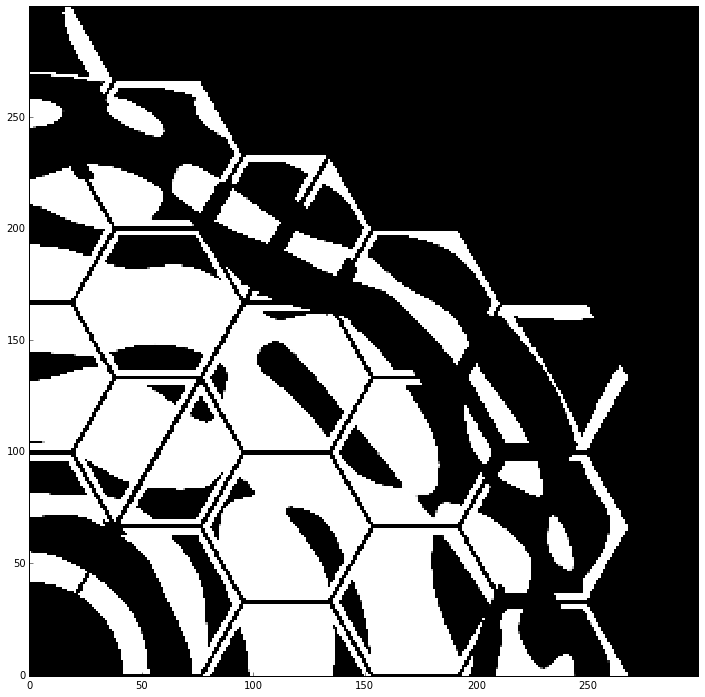

In [288]:
plt.figure(figsize=(12,12))
#plt.imshow(A*TelAp - A)
plt.imshow(A*TelAp)

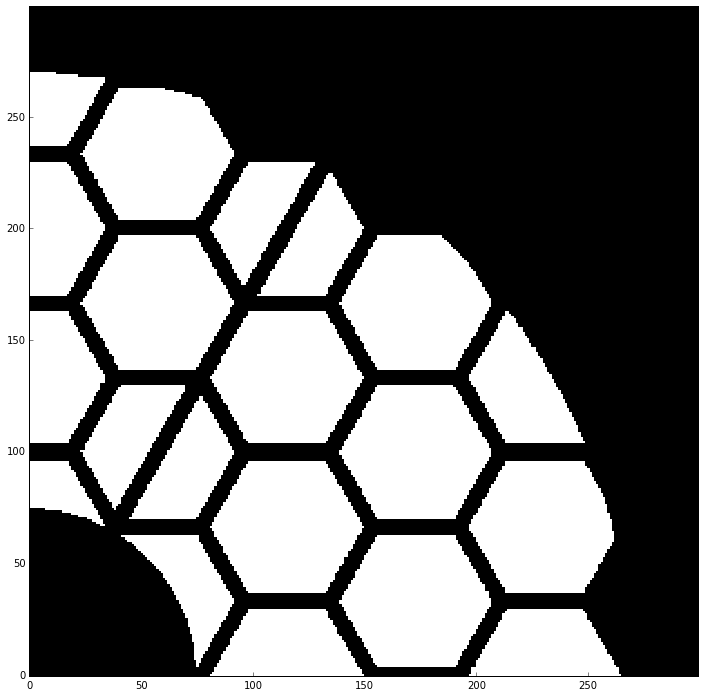

In [289]:
plt.figure(figsize=(12,12))
plt.imshow(LS,vmin=0.5,vmax=1)

# Monochromatic PSF evaluation

## Set dimensions and coordinates

In [290]:
D = 1.
M_fp1 = FPM.shape[0]
fpm_rad = 4.
rho1 = 10.
fp2res = 8.
M_fp2 = int(np.ceil(rho1*fp2res))

# pupil plane
dx = (D/2)/N
dy = dx
xs = np.matrix(np.linspace(0.5,N-0.5,N)*dx)
ys = xs.copy()

# FPM
dmx = fpm_rad/M_fp1
dmy = dmx
mxs = np.matrix(np.linspace(0.5,M_fp1-0.5,M_fp1)*dmx)
mys = mxs.copy()

# FP2
dxi = 1/fp2res
xis = np.matrix(np.linspace(0.5,M_fp2-0.5,M_fp2)*dxi)
etas = xis

## Semi-analytical cosine propagation

In [291]:
Psi_B = 4*dx*dy*np.dot(np.dot(np.cos(2*np.pi*np.dot(mys.T, ys)), A*TelAp ), np.cos(2*np.pi*np.dot(xs.T, mxs)))
Psi_B_stop = np.multiply(Psi_B, FPM)
Psi_C = A*TelAp - 4*dmx*dmy*np.dot(np.cos(2*np.pi*np.dot(ys.T, mys)), Psi_B_stop).dot(np.cos(2*np.pi*np.dot(mxs.T, xs)))
Psi_C_stop = np.multiply(Psi_C, LS)
Psi_D = 4*dx*dy*np.dot(np.cos(2*np.pi*np.dot(etas.T, ys)), Psi_C_stop ).dot(np.cos(2*np.pi*np.dot(xs.T, xis)))
Psi_D_0 = 4*dx*dy*np.dot(np.cos(2*np.pi*np.dot(etas.T, ys)), A*TelAp*LS ).dot(np.cos(2*np.pi*np.dot(xs.T, xis)))
Psi_D_0_peak = 4*np.sum(A*TelAp*LS)*dx*dy

In [292]:
Intens_B = np.power(np.absolute(Psi_B_stop), 2)
Intens_C = np.power(np.absolute(Psi_C_stop), 2)
Intens_D = np.power(np.absolute(Psi_D/Psi_D_0_peak), 2)
Intens_D_0 = np.power(np.absolute(Psi_D_0), 2)
Intens_D_0_peak = Psi_D_0_peak**2

## Final image

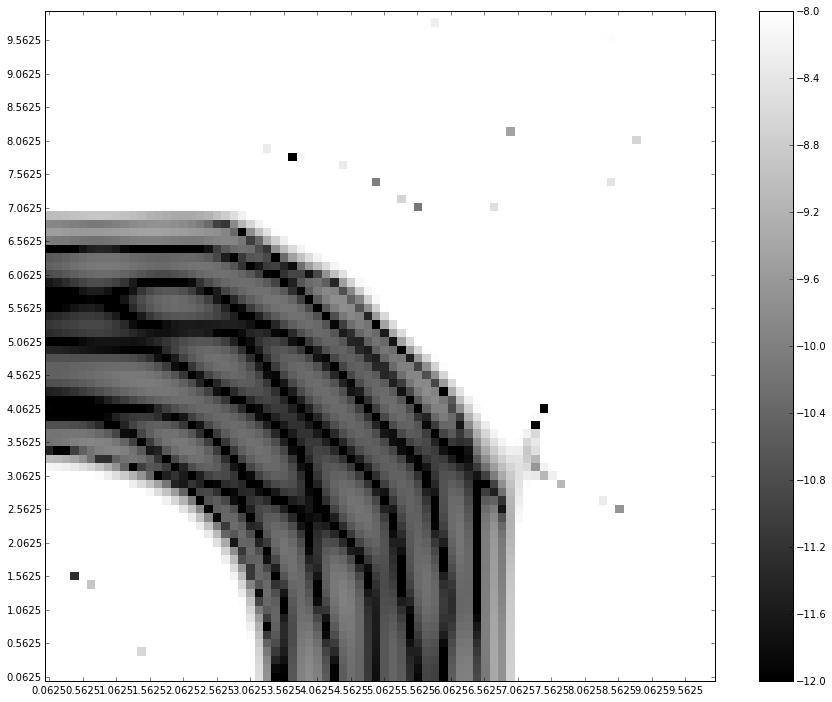

In [293]:
plt.figure(figsize=(16,12))
plt.imshow(np.log10(Intens_D), vmin=-12, vmax=-8)
#plt.imshow(np.log10(Intens_D))
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(0,M_fp2,4))
ax.set_xticklabels((np.arange(0,M_fp2,4)+0.5)*dxi)
ax.set_yticks(np.arange(0,M_fp2,4))
ax.set_yticklabels((np.arange(0,M_fp2,4)+0.5)*dxi)

## Airy throughput

Airy throughput = 19.8%


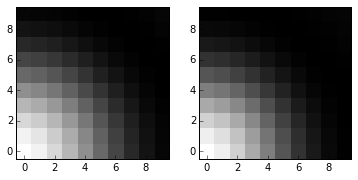

In [294]:
Psi_TelAp = 4*dx*dy*np.dot(np.cos(2*np.pi*np.dot(etas.T, ys)), TelAp ).dot(np.cos(2*np.pi*np.dot(xs.T, xis)))
Intens_TelAp = np.power(np.absolute(Psi_TelAp), 2)
Intens_TelAp_peak = (4*np.sum(TelAp)*dx*dy)**2
fwhm_ind_TelAp = np.greater_equal(Intens_TelAp, Intens_TelAp_peak/2)
fwhm_ind_APLC = np.greater_equal(Intens_D_0, Intens_D_0_peak/2)

fwhm_sum_TelAp = np.sum(Intens_TelAp[fwhm_ind_TelAp])
fwhm_sum_APLC = np.sum(Intens_D_0[fwhm_ind_APLC])

airy_thrupt = fwhm_sum_APLC/fwhm_sum_TelAp
print("Airy throughput = {:.1f}%".format(100*airy_thrupt))

plt.subplot(121)
plt.imshow(Intens_D_0[:10,:10])
plt.subplot(122)
plt.imshow(Intens_TelAp[:10,:10])

## First image

In [295]:
#plt.figure(figsize=(16,12))
#plt.imshow(np.log10(Intens_B),vmin=-6)
#plt.colorbar()

## Lyot plane

/Users/ntz/ssbvirt/ssbdev-osx/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


<matplotlib.colorbar.Colorbar instance at 0x13fc7f518>

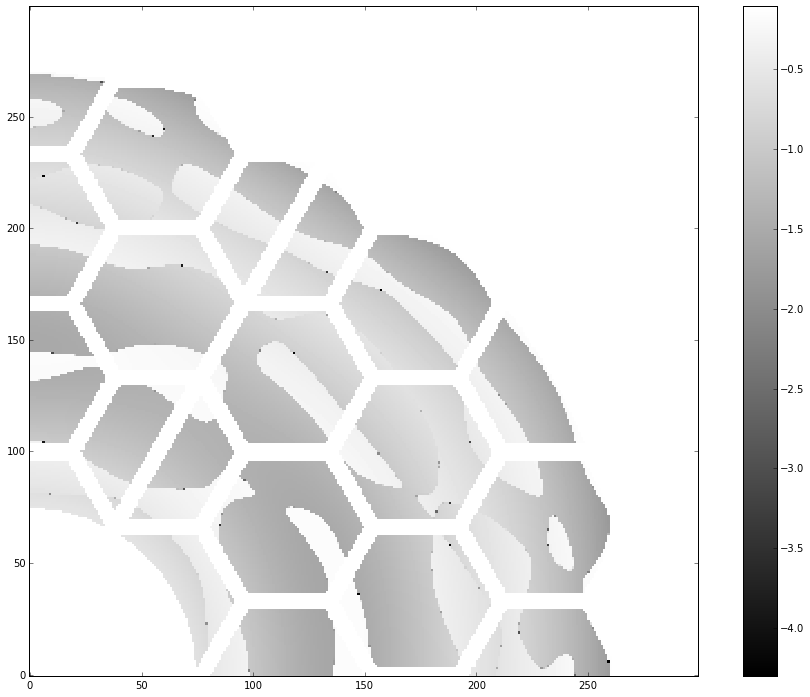

In [296]:
plt.figure(figsize=(16,12))
plt.imshow(np.log10(Intens_C))
plt.colorbar()